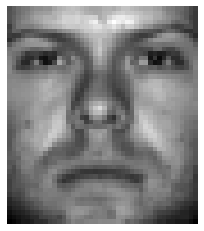

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

# load the data
yalefaces = np.loadtxt('yalefaces.csv', delimiter=',')

# display the first image
plt.imshow(yalefaces[:,0].reshape((48,42)), cmap='gray')
plt.axis('off')
plt.show()

In [2]:
# Centering and scaling the data
mean = yalefaces.mean(axis=1)
X = yalefaces - mean[:,np.newaxis]
X_scaled = StandardScaler().fit_transform(yalefaces)

# Singular Value Decomposition of Covariance Matrix X*X^T
U, s, V_T = np.linalg.svd(X_scaled.T)

S = np.diag(s)
s1 = S[0,0]
print(s1,s[1],s[2])

#cov_X = np.cov(X_scaled)
cov_X = X_scaled@X_scaled.T
eigenvalues, eigenvectors = np.linalg.eig(cov_X)

1359.2474503561634 941.9038552681624 604.8511653002398


Text(0.5, 0, 'Index for descending value order')

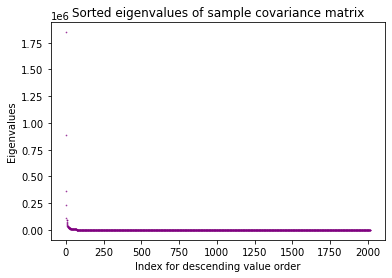

In [3]:
# Plot sorted eigenvalues of sample cov matrix

fig, ax = plt.subplots()
sorted_idx = np.linspace(0,2016,2016)
ax.scatter(sorted_idx,np.abs(eigenvalues),alpha=0.7, s=0.5,c='purple')
plt.title('Sorted eigenvalues of sample covariance matrix')
plt.ylabel('Eigenvalues')
plt.xlabel('Index for descending value order')

In [6]:
# Number of principal components needed to achieve a certain percentage of total variation
total_var = np.cumsum(eigenvalues)/eigenvalues.sum()
    
# alternatively for total variance: print(np.sum(np.abs(eigenvalues)))

j = total_var.shape[0] - (total_var > 0.95).sum()
k = total_var.shape[0] - (total_var > 0.99).sum()
var_pcs1 = sum(eigenvalues[:j])
var_pcs2 = sum(eigenvalues[:k])

print('Representation of total variation by',j,'principal component(s): 95%')
print('Percentage reduction in dimension:', (eigenvalues.shape[0]-j)/eigenvalues.shape[0]*100,'%')

print('Representation of total variation by',k,'principal component(s): 99%')
print('Percentage reduction in dimension:', (eigenvalues.shape[0]-k)/eigenvalues.shape[0]*100,'%')


Representation of total variation by 75 principal component(s): 95%
Percentage reduction in dimension: 96.27976190476191 %
Representation of total variation by 237 principal component(s): 99%
Percentage reduction in dimension: 88.24404761904762 %


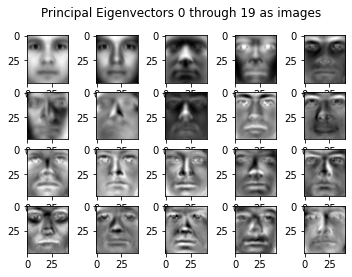

In [7]:
# Treat sample mean as zeroth order principal eigenvector
V_T[0,:] = yalefaces.mean(axis=1)

# PCA with first 20 eigenvectors
fig, axs = plt.subplots(4,5)
fig.suptitle('Principal Eigenvectors 0 through 19 as images')
c=0
for i in range(4):
    for j in range(5):
        axs[i,j].imshow(V_T[c,:].reshape((48,42)),cmap='gray')
        c+=1

Some principal components focus on dark/shadowed characteristics of the faces, while others focus on lighter ones. Therefore some images seem brighter than others. This also probably has to do with the lighting while the pictures were being taken. The first image is the clearest one, which makes sense since we used the mean of the samples to plot it.
We also see that the principal eigenvectors focus on certain parts of the faces, some focus on the nose, others on the mouth or the eyes/eyebrows. The facial characteristics "focused on" by a PC are brighter or darker than the rest and "stand out" in each case.